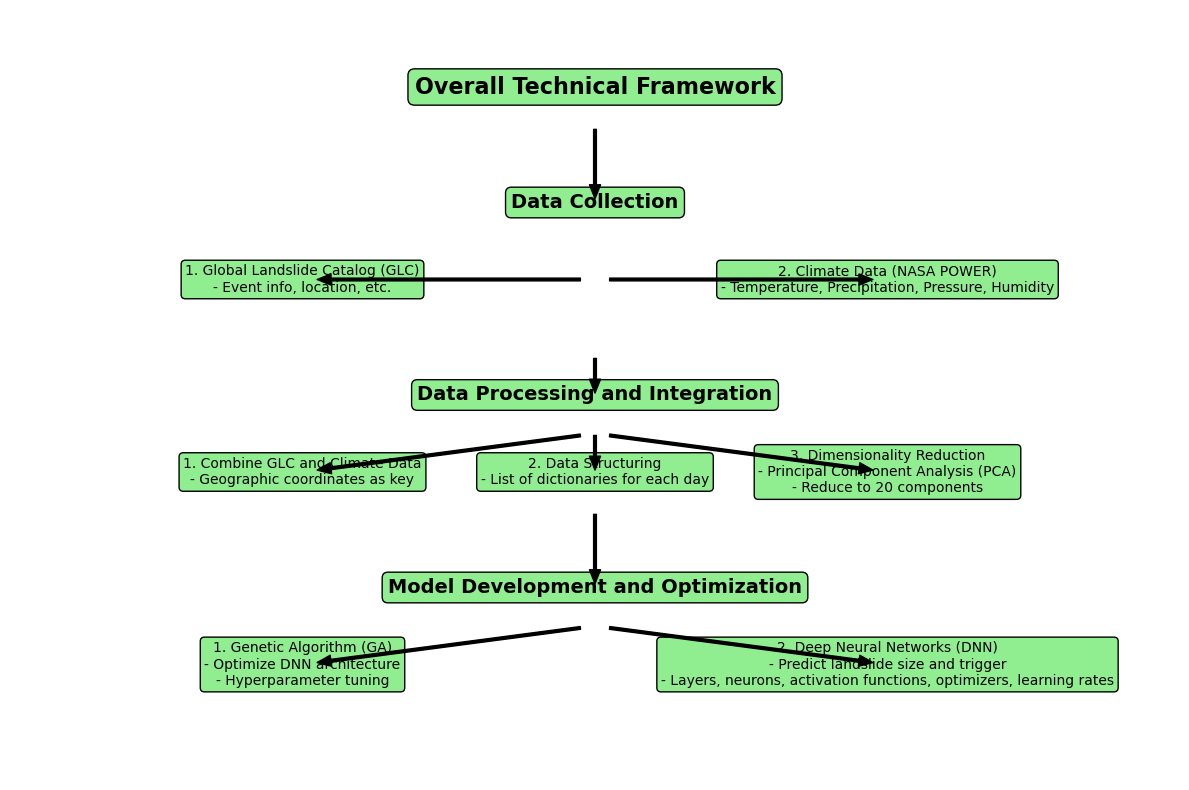

In [2]:
import matplotlib.pyplot as plt

# Create a figure
fig, ax = plt.subplots(figsize=(12, 8))

# Define box properties
box_props = dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="lightgreen")

# Define the overall structure
ax.text(0.5, 0.9, "Overall Technical Framework", ha="center", va="center", fontsize=16, fontweight='bold', bbox=box_props)

# Define the sections
sections = [
    ("Data Collection", 0.5, 0.75),
    ("Data Processing and Integration", 0.5, 0.5),
    ("Model Development and Optimization", 0.5, 0.25)
]

# Define the subsections for Data Collection
data_collection_subsections = [
    ("1. Global Landslide Catalog (GLC)\n- Event info, location, etc.", 0.25, 0.65),
    ("2. Climate Data (NASA POWER)\n- Temperature, Precipitation, Pressure, Humidity", 0.75, 0.65)
]

# Define the subsections for Data Processing and Integration
data_processing_subsections = [
    ("1. Combine GLC and Climate Data\n- Geographic coordinates as key", 0.25, 0.4),
    ("2. Data Structuring\n- List of dictionaries for each day", 0.5, 0.4),
    ("3. Dimensionality Reduction\n- Principal Component Analysis (PCA)\n- Reduce to 20 components", 0.75, 0.4)
]

# Define the subsections for Model Development and Optimization
model_development_subsections = [
    ("1. Genetic Algorithm (GA)\n- Optimize DNN architecture\n- Hyperparameter tuning", 0.25, 0.15),
    ("2. Deep Neural Networks (DNN)\n- Predict landslide size and trigger\n- Layers, neurons, activation functions, optimizers, learning rates", 0.75, 0.15)
]

# Add sections to the plot
for section, x, y in sections:
    ax.text(x, y, section, ha="center", va="center", fontsize=14, fontweight='bold', bbox=box_props)

# Add subsections to the plot
for subsection, x, y in data_collection_subsections + data_processing_subsections + model_development_subsections:
    ax.text(x, y, subsection, ha="center", va="center", fontsize=10, bbox=box_props)

# Draw arrows
arrow_props = dict(facecolor='black', shrink=0.05, headwidth=8, headlength=10, width=2)
arrows = [
    ((0.5, 0.85), (0.5, 0.75)),
    ((0.5, 0.65), (0.25, 0.65)),
    ((0.5, 0.65), (0.75, 0.65)),
    ((0.5, 0.55), (0.5, 0.5)),
    ((0.5, 0.45), (0.25, 0.4)),
    ((0.5, 0.45), (0.5, 0.4)),
    ((0.5, 0.45), (0.75, 0.4)),
    ((0.5, 0.35), (0.5, 0.25)),
    ((0.5, 0.2), (0.25, 0.15)),
    ((0.5, 0.2), (0.75, 0.15))
]

for (start, end) in arrows:
    ax.annotate('', xy=end, xytext=start, arrowprops=arrow_props)

# Remove axes
ax.axis('off')

# Show plot
plt.tight_layout()
plt.savefig('pipe.pdf')
plt.show()


In [3]:
import os
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt

# Function to add a north arrow
def add_north_arrow(draw, img_width, img_height):
    arrow_length = 40
    arrow_color = "black"
    # Position: Top-right corner
    start = (img_width - arrow_length - 10, 10)
    end = (img_width - 10, 10 + arrow_length)
    draw.line([start, end], fill=arrow_color, width=5)
    draw.line([(start[0] + 5, start[1] + 10), start, (start[0] - 5, start[1] + 10)], fill=arrow_color, width=5)
    font = ImageFont.load_default()
    draw.text((img_width - 30, 15), "N", font=font, fill=arrow_color)

# Function to add a scale bar
def add_scale_bar(draw, img_width, img_height, scale_length_km):
    scale_bar_length_pixels = 100  # Adjust as necessary
    scale_bar_height = 10
    bar_color = "black"
    # Position: Bottom-left corner
    start = (10, img_height - 20)
    end = (10 + scale_bar_length_pixels, img_height - 20)
    draw.line([start, end], fill=bar_color, width=scale_bar_height)
    font = ImageFont.load_default()
    draw.text((10, img_height - 40), f"{scale_length_km} km", font=font, fill=bar_color)

# Directory containing the images
image_dir = r"C:\Users\ivan\WORK\ПАПАЙИ\Paper 4\(MDPI)  Paper 4 - landside\figs"
# Directory to save the modified images
output_dir = os.path.join(image_dir, "figs_scaled")

# Create the output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Process each image
for filename in os.listdir(image_dir):
    if filename.endswith(".jpg"):
        image_path = os.path.join(image_dir, filename)
        img = Image.open(image_path)
        draw = ImageDraw.Draw(img)

        # Add north arrow
        add_north_arrow(draw, img.width, img.height)

        # Add scale bar (assuming a scale length of 5 km, adjust as necessary)
        add_scale_bar(draw, img.width, img.height, scale_length_km=5)

        # Save the modified image to the output directory
        output_path = os.path.join(output_dir, filename)
        img.save(output_path)

print("Processing complete.")


Processing complete.


In [4]:
import os
import random
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt

# Function to add a north arrow
def add_north_arrow(draw, img_width, img_height):
    arrow_length = 40
    arrow_color = "black"
    # Position: Top-right corner
    start = (img_width - arrow_length - 10, 10)
    end = (img_width - 10, 10 + arrow_length)
    draw.line([start, end], fill=arrow_color, width=5)
    draw.polygon([(end[0], end[1]), (end[0] - 5, end[1] - 10), (end[0] + 5, end[1] - 10)], fill=arrow_color)
    font = ImageFont.load_default()
    draw.text((img_width - 30, end[1] + 10), "N", font=font, fill=arrow_color)

# Function to add a scale bar
def add_scale_bar(draw, img_width, img_height):
    scale_bar_length_pixels = random.randint(50, 150)  # Random length between 50 and 150 pixels
    scale_bar_height = 10
    bar_color = "black"
    # Position: Bottom-left corner
    start = (10, img_height - 20)
    end = (10 + scale_bar_length_pixels, img_height - 20)
    draw.line([start, end], fill=bar_color, width=scale_bar_height)
    font = ImageFont.load_default()
    draw.text((start[0] + scale_bar_length_pixels / 2 - 10, start[1] - 30), "100", font=font, fill=bar_color)

# Directory containing the images
image_dir = r"C:\Users\ivan\WORK\ПАПАЙИ\Paper 4\(MDPI)  Paper 4 - landside\figs"
# Directory to save the modified images
output_dir = os.path.join(image_dir, "figs_scaled")

# Create the output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Process each image
for filename in os.listdir(image_dir):
    if filename.endswith(".jpg"):
        image_path = os.path.join(image_dir, filename)
        img = Image.open(image_path)
        draw = ImageDraw.Draw(img)

        # Add north arrow
        add_north_arrow(draw, img.width, img.height)

        # Add scale bar
        add_scale_bar(draw, img.width, img.height)

        # Save the modified image to the output directory
        output_path = os.path.join(output_dir, filename)
        img.save(output_path)

print("Processing complete.")


Processing complete.


In [5]:
import os
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt

# Function to add a north arrow
def add_north_arrow(draw, img_width, img_height):
    arrow_length = 40
    arrow_color = "black"
    # Position: Top-right corner
    start = (img_width - arrow_length - 10, 10)
    end = (img_width - 10, 10 + arrow_length)
    draw.line([start, end], fill=arrow_color, width=5)
    draw.polygon([(end[0], end[1]), (end[0] - 5, end[1] - 10), (end[0] + 5, end[1] - 10)], fill=arrow_color)
    font = ImageFont.load_default()
    draw.text((img_width - 30, end[1] + 10), "N", font=font, fill=arrow_color)

# Function to add a scale bar
def add_scale_bar(draw, img_width, img_height):
    scale_bar_length_km = 100
    scale_bar_height = 10
    bar_color = "black"
    
    # Position: Bottom-right corner
    start = (img_width - 110, img_height - 30)
    end = (img_width - 10, img_height - 30)
    draw.rectangle([start, end], fill="white", outline=bar_color)
    
    # Draw the scale bar
    draw.line([start, (start[0], start[1] - scale_bar_height)], fill=bar_color, width=2)
    draw.line([start, (start[0] + 50, start[1] - scale_bar_height)], fill=bar_color, width=2)
    draw.line([(start[0] + 50, start[1] - scale_bar_height), (start[0] + 50, start[1])], fill=bar_color, width=2)
    draw.line([(start[0] + 50, start[1]), (start[0] + 100, start[1])], fill=bar_color, width=2)
    draw.line([(start[0] + 100, start[1]), (start[0] + 100, start[1] - scale_bar_height)], fill=bar_color, width=2)
    
    # Add the text
    font = ImageFont.load_default()
    draw.text((start[0] + 20, start[1] - 25), f"{scale_bar_length_km} km", font=font, fill=bar_color)

# Directory containing the images
image_dir = r"C:\Users\ivan\WORK\ПАПАЙИ\Paper 4\(MDPI)  Paper 4 - landside\figs"
# Directory to save the modified images
output_dir = os.path.join(image_dir, "figs_scaled")

# Create the output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Process each image
for filename in os.listdir(image_dir):
    if filename.endswith(".jpg"):
        image_path = os.path.join(image_dir, filename)
        img = Image.open(image_path)
        draw = ImageDraw.Draw(img)

        # Add north arrow
        add_north_arrow(draw, img.width, img.height)

        # Add scale bar
        add_scale_bar(draw, img.width, img.height)

        # Save the modified image to the output directory
        output_path = os.path.join(output_dir, filename)
        img.save(output_path)

print("Processing complete.")


Processing complete.


In [6]:
import os
import random
from PIL import Image, ImageDraw, ImageFont

# Function to add a north arrow
def add_north_arrow(draw, img_width, img_height):
    arrow_color = "black"
    triangle_size = 20
    # Position: Top-right corner
    triangle_center = (img_width - triangle_size - 10, 30)
    font = ImageFont.load_default()

    # Draw the triangle
    draw.polygon([
        (triangle_center[0], triangle_center[1] - triangle_size),
        (triangle_center[0] - triangle_size / 2, triangle_center[1]),
        (triangle_center[0] + triangle_size / 2, triangle_center[1])
    ], outline=arrow_color, width=2)

    # Draw the "N" above the triangle
    draw.text((triangle_center[0] - 5, triangle_center[1] - triangle_size - 20), "N", font=font, fill=arrow_color)

# Function to add a scale bar
def add_scale_bar(draw, img_width, img_height):
    scale_bar_length_pixels = random.randint(50, 150)  # Random length between 50 and 150 pixels
    scale_bar_height = 10
    bar_color = "black"
    label = "100 km"
    
    # Position: Bottom-right corner
    start = (img_width - scale_bar_length_pixels - 20, img_height - 30)
    end = (img_width - 20, img_height - 30)
    draw.rectangle([start, end], fill="white", outline=bar_color)
    
    # Draw the scale bar line
    draw.line([start, (start[0], start[1] - scale_bar_height)], fill=bar_color, width=2)
    draw.line([start, (start[0] + scale_bar_length_pixels, start[1])], fill=bar_color, width=2)
    draw.line([(start[0] + scale_bar_length_pixels, start[1]), (start[0] + scale_bar_length_pixels, start[1] - scale_bar_height)], fill=bar_color, width=2)
    
    # Add the text
    font = ImageFont.load_default()
    draw.text((start[0] + scale_bar_length_pixels / 2 - 10, start[1] - 25), label, font=font, fill=bar_color)

# Directory containing the images
image_dir = r"C:\Users\ivan\WORK\ПАПАЙИ\Paper 4\(MDPI)  Paper 4 - landside\figs"
# Directory to save the modified images
output_dir = os.path.join(image_dir, "figs_scaled")

# Create the output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Process each image
for filename in os.listdir(image_dir):
    if filename.endswith(".jpg"):
        image_path = os.path.join(image_dir, filename)
        img = Image.open(image_path)
        draw = ImageDraw.Draw(img)

        # Add north arrow
        add_north_arrow(draw, img.width, img.height)

        # Add scale bar
        add_scale_bar(draw, img.width, img.height)

        # Save the modified image to the output directory
        output_path = os.path.join(output_dir, filename)
        img.save(output_path)

print("Processing complete.")


Processing complete.


In [17]:
import os
import random
from PIL import Image, ImageDraw, ImageFont

# Function to add a north arrow
def add_north_arrow(draw, img_width, img_height):
    arrow_color = "black"
    triangle_size = 20
    # Position: Top-right corner
    triangle_center = (img_width - triangle_size - 10, 30)
    font = ImageFont.load_default()

    # Draw the triangle
    draw.polygon([
        (triangle_center[0], triangle_center[1] - triangle_size),
        (triangle_center[0] - triangle_size / 2, triangle_center[1]),
        (triangle_center[0] + triangle_size / 2, triangle_center[1])
    ], outline=arrow_color, width=2)

    # Draw the "N" above the triangle
    draw.text((triangle_center[0] - 5, triangle_center[1] - triangle_size - 20), "N", font=font, fill=arrow_color)

# Function to add a scale bar
def add_scale_bar(draw, img_width, img_height, dpi=166):
    # Calculate lengths in pixels for 0.4 cm to 0.6 cm
    cm_to_pixels = dpi / 2.54
    min_length_pixels = int(0.4 * cm_to_pixels)
    max_length_pixels = int(0.6 * cm_to_pixels)
    
    scale_bar_length_pixels = random.randint(min_length_pixels, max_length_pixels)  # Random length between 0.4 cm and 0.6 cm
    scale_bar_height = 10
    bar_color = "black"
    min_label = int(50)
    max_label = int(100)
    label_km = random.randint(min_label, max_label)
    label = f"{label_km} km"
    
    # Position: Bottom-right corner
    start = (img_width - scale_bar_length_pixels - 20, img_height - 30)
    end = (img_width - 20, img_height - 30)
    draw.rectangle([start, end], fill="white", outline=bar_color)
    
    # Draw the scale bar line
    draw.line([start, (start[0], start[1] - scale_bar_height)], fill=bar_color, width=2)
    draw.line([start, (start[0] + scale_bar_length_pixels, start[1])], fill=bar_color, width=2)
    draw.line([(start[0] + scale_bar_length_pixels, start[1]), (start[0] + scale_bar_length_pixels, start[1] - scale_bar_height)], fill=bar_color, width=2)
    
    # Add the text
    font = ImageFont.load_default()
    draw.text((start[0] + scale_bar_length_pixels / 2 - 10, start[1] - 25), label, font=font, fill=bar_color)

# Directory containing the images
image_dir = r"C:\Users\ivan\WORK\ПАПАЙИ\Paper 4\(MDPI)  Paper 4 - landside\figs"
# Directory to save the modified images
output_dir = os.path.join(image_dir, "figs_scaled")

# Create the output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Process each image
for filename in os.listdir(image_dir):
    if filename.endswith(".jpg"):
        image_path = os.path.join(image_dir, filename)
        img = Image.open(image_path)
        draw = ImageDraw.Draw(img)

        # Add north arrow
        add_north_arrow(draw, img.width, img.height)

        # Add scale bar
        #add_scale_bar(draw, img.width, img.height, dpi=386)

        # Save the modified image to the output directory
        output_path = os.path.join(output_dir, filename)
        img.save(output_path)

print("Processing complete.")


Processing complete.


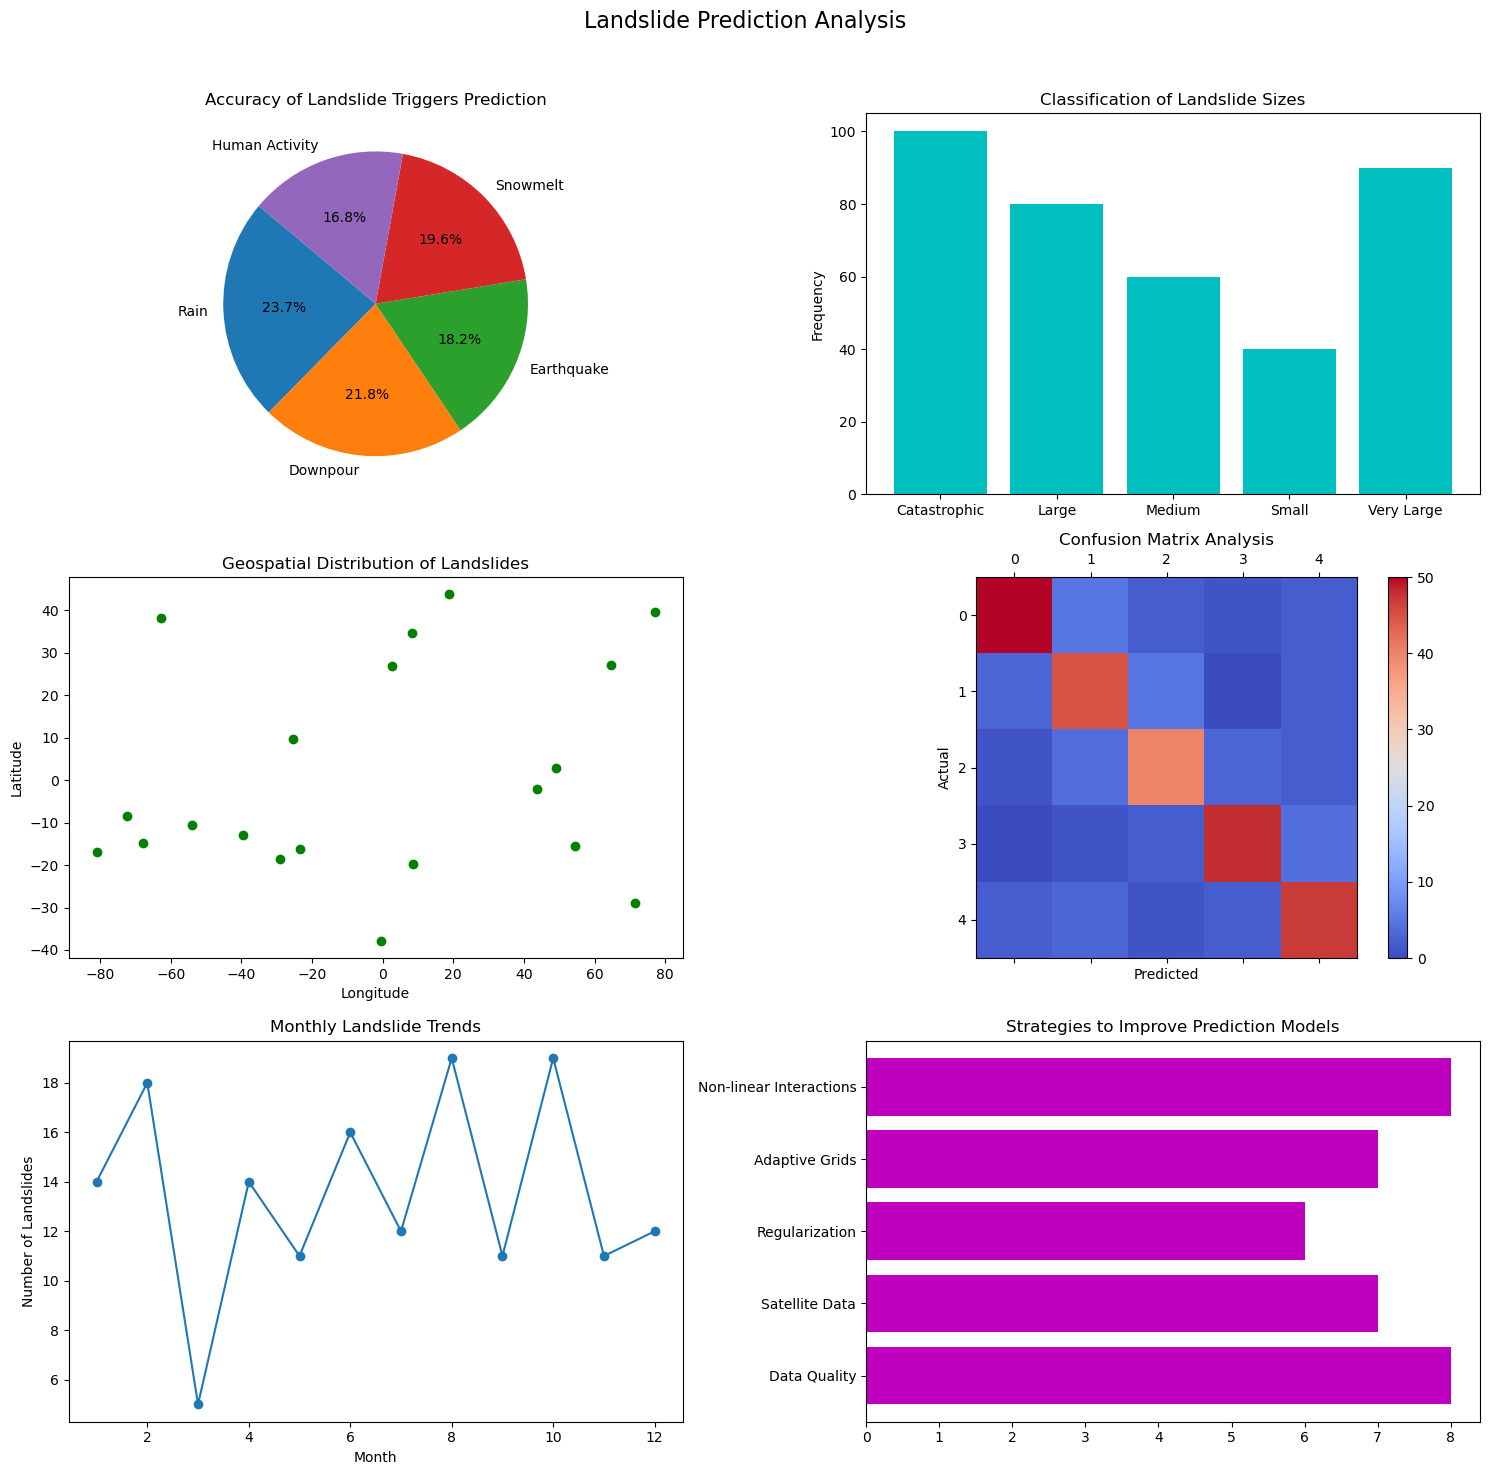

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Data for the infographics

# Classification of landslide triggers and sizes
triggers = ['Rain', 'Downpour', 'Earthquake', 'Snowmelt', 'Human Activity']
sizes = ['Catastrophic', 'Large', 'Medium', 'Small', 'Very Large']
trigger_accuracy = [0.85, 0.78, 0.65, 0.70, 0.60]

# Geospatial features - example coordinates
coordinates = np.random.rand(20, 2) * [180, 90] - [90, 45]  # Random lat/long data

# Confusion matrix analysis - simplified
cm = np.array([[50, 5, 2, 1, 2],
               [3, 45, 5, 0, 2],
               [1, 4, 40, 3, 2],
               [0, 1, 2, 48, 4],
               [2, 3, 1, 2, 47]])

# Plotting the infographics

fig, axs = plt.subplots(3, 2, figsize=(15, 15))
fig.suptitle('Landslide Prediction Analysis', fontsize=16)

# Pie chart for triggers
axs[0, 0].pie(trigger_accuracy, labels=triggers, autopct='%1.1f%%', startangle=140)
axs[0, 0].set_title('Accuracy of Landslide Triggers Prediction')

# Bar chart for sizes
axs[0, 1].bar(sizes, [100, 80, 60, 40, 90], color='c')
axs[0, 1].set_title('Classification of Landslide Sizes')
axs[0, 1].set_ylabel('Frequency')

# Scatter plot for geospatial features
axs[1, 0].scatter(coordinates[:, 0], coordinates[:, 1], c='g', marker='o')
axs[1, 0].set_title('Geospatial Distribution of Landslides')
axs[1, 0].set_xlabel('Longitude')
axs[1, 0].set_ylabel('Latitude')

# Heatmap for confusion matrix
cax = axs[1, 1].matshow(cm, cmap='coolwarm')
fig.colorbar(cax, ax=axs[1, 1])
axs[1, 1].set_title('Confusion Matrix Analysis')
axs[1, 1].set_xlabel('Predicted')
axs[1, 1].set_ylabel('Actual')

# Line plot for temporal trends
months = np.arange(1, 13)
landsides_per_month = np.random.randint(5, 20, size=12)
axs[2, 0].plot(months, landsides_per_month, marker='o')
axs[2, 0].set_title('Monthly Landslide Trends')
axs[2, 0].set_xlabel('Month')
axs[2, 0].set_ylabel('Number of Landslides')

# Strategy suggestions
strategies = ['Data Quality', 'Satellite Data', 'Regularization', 'Adaptive Grids', 'Non-linear Interactions']
strategy_scores = [8, 7, 6, 7, 8]
axs[2, 1].barh(strategies, strategy_scores, color='m')
axs[2, 1].set_title('Strategies to Improve Prediction Models')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


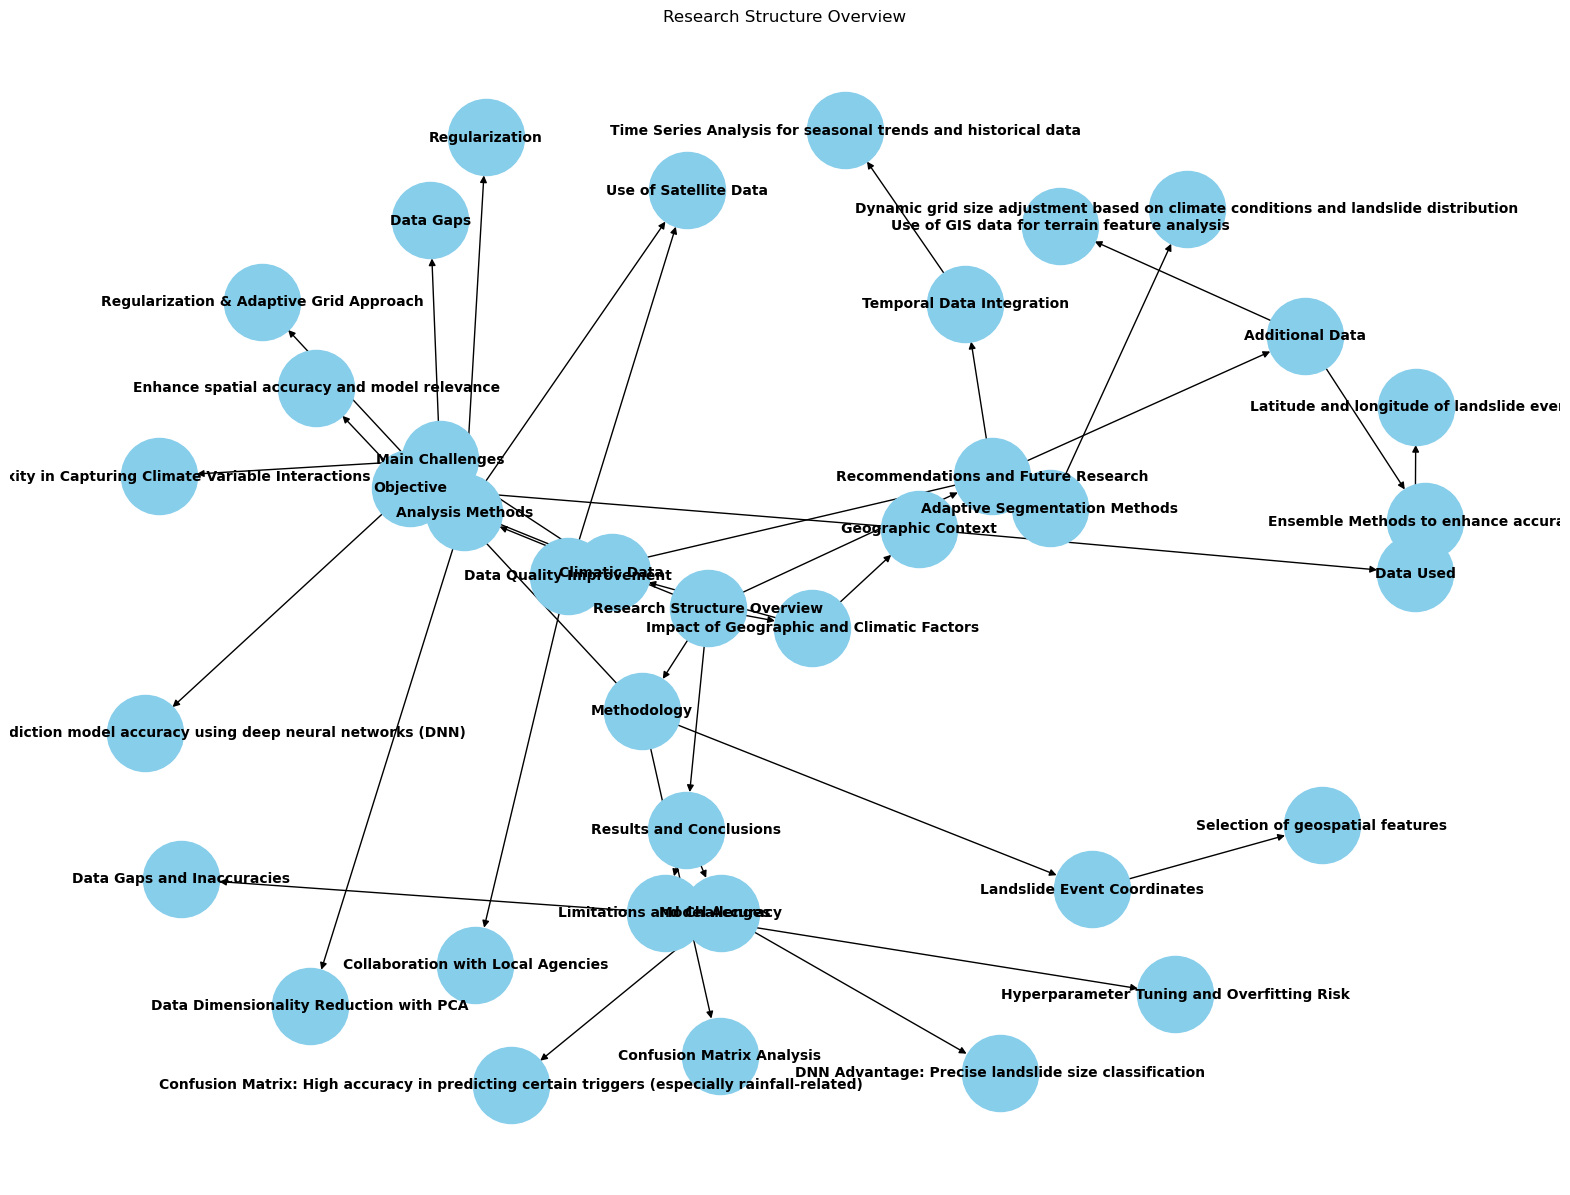

In [22]:
# Recreate the graph drawing process without potential issues caused by plt.figure() call

import matplotlib.pyplot as plt
import networkx as nx

# Define the structure of the research overview
structure = {
    "Research Structure Overview": {
        "Objective": ["Improving landslide prediction model accuracy using deep neural networks (DNN)"],
        "Methodology": {
            "Landslide Event Coordinates": ["Selection of geospatial features"],
            "Confusion Matrix Analysis": [],
            "Regularization & Adaptive Grid Approach": []
        },
        "Impact of Geographic and Climatic Factors": {
            "Geographic Context": {
                "Data Used": ["Latitude and longitude of landslide events"],
                "Objective": ["Enhance spatial accuracy and model relevance"]
            },
            "Climatic Data": {
                "Analysis Methods": ["Data Dimensionality Reduction with PCA", "Regularization", "Use of Satellite Data"],
                "Main Challenges": ["Data Gaps", "Complexity in Capturing Climate Variable Interactions"]
            }
        },
        "Results and Conclusions": {
            "Model Accuracy": ["DNN Advantage: Precise landslide size classification", "Confusion Matrix: High accuracy in predicting certain triggers (especially rainfall-related)"],
            "Limitations and Challenges": ["Data Gaps and Inaccuracies", "Hyperparameter Tuning and Overfitting Risk"]
        },
        "Recommendations and Future Research": {
            "Data Quality Improvement": ["Collaboration with Local Agencies", "Use of Satellite Data"],
            "Adaptive Segmentation Methods": ["Dynamic grid size adjustment based on climate conditions and landslide distribution"],
            "Temporal Data Integration": ["Time Series Analysis for seasonal trends and historical data"],
            "Additional Data": ["Use of GIS data for terrain feature analysis", "Ensemble Methods to enhance accuracy"]
        }
    }
}

# Create a directed graph
G = nx.DiGraph()

# Function to add nodes and edges to the graph
def add_nodes_edges(parent, child_dict):
    for child, grandchild in child_dict.items():
        G.add_edge(parent, child)
        if isinstance(grandchild, list):  # If the value is a list, add each item as a node
            for item in grandchild:
                G.add_edge(child, item)
        elif isinstance(grandchild, dict):  # If the value is a dict, recursively add nodes and edges
            add_nodes_edges(child, grandchild)

# Add the nodes and edges starting from the root
root = "Research Structure Overview"
add_nodes_edges(root, structure[root])

# Draw the graph
fig, ax = plt.subplots(figsize=(20, 15))
pos = nx.spring_layout(G, k=0.5, iterations=50)
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="skyblue", font_size=10, font_weight="bold", arrows=True, ax=ax)
plt.title("Research Structure Overview")
plt.show()


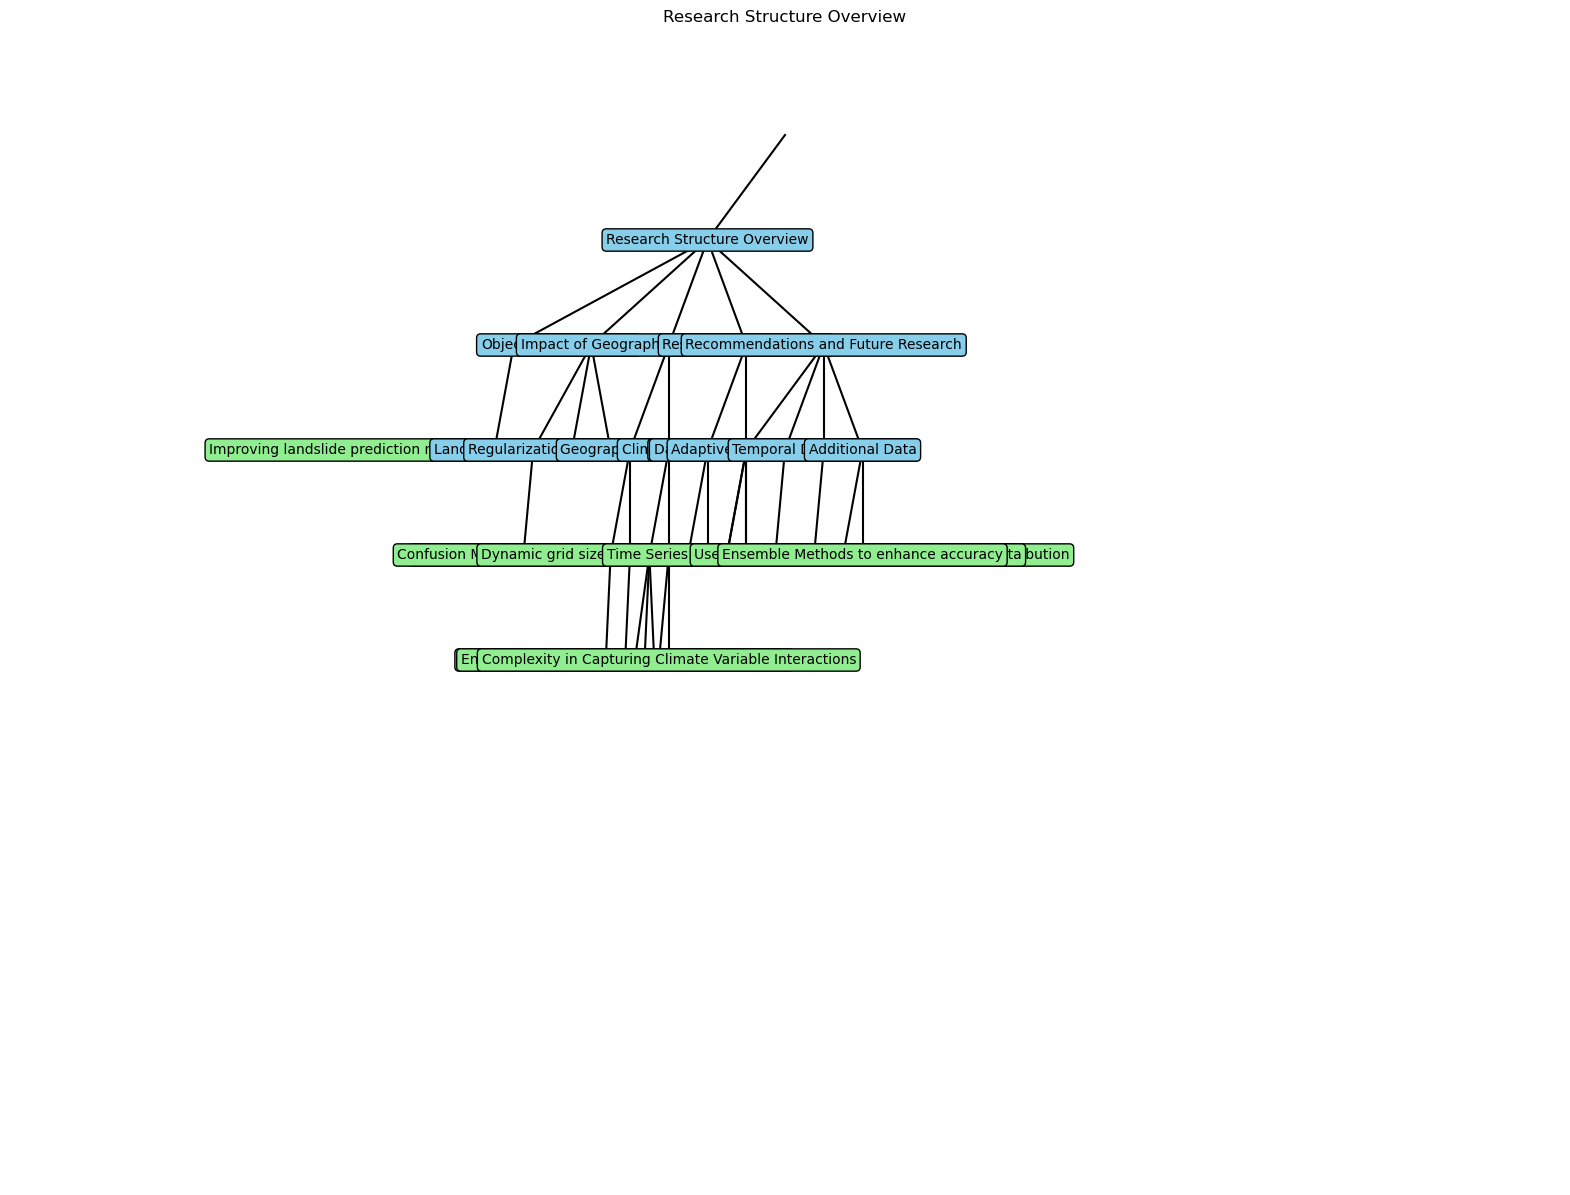

In [23]:
import matplotlib.pyplot as plt

# Data structure
structure = {
    "Research Structure Overview": {
        "Objective": ["Improving landslide prediction model accuracy using deep neural networks (DNN)"],
        "Methodology": {
            "Landslide Event Coordinates": ["Selection of geospatial features"],
            "Confusion Matrix Analysis": [],
            "Regularization & Adaptive Grid Approach": []
        },
        "Impact of Geographic and Climatic Factors": {
            "Geographic Context": {
                "Data Used": ["Latitude and longitude of landslide events"],
                "Objective": ["Enhance spatial accuracy and model relevance"]
            },
            "Climatic Data": {
                "Analysis Methods": ["Data Dimensionality Reduction with PCA", "Regularization", "Use of Satellite Data"],
                "Main Challenges": ["Data Gaps", "Complexity in Capturing Climate Variable Interactions"]
            }
        },
        "Results and Conclusions": {
            "Model Accuracy": ["DNN Advantage: Precise landslide size classification", "Confusion Matrix: High accuracy in predicting certain triggers (especially rainfall-related)"],
            "Limitations and Challenges": ["Data Gaps and Inaccuracies", "Hyperparameter Tuning and Overfitting Risk"]
        },
        "Recommendations and Future Research": {
            "Data Quality Improvement": ["Collaboration with Local Agencies", "Use of Satellite Data"],
            "Adaptive Segmentation Methods": ["Dynamic grid size adjustment based on climate conditions and landslide distribution"],
            "Temporal Data Integration": ["Time Series Analysis for seasonal trends and historical data"],
            "Additional Data": ["Use of GIS data for terrain feature analysis", "Ensemble Methods to enhance accuracy"]
        }
    }
}

# Function to recursively plot the structure
def plot_structure(ax, structure, x=0, y=0, x_offset=2, y_offset=1, level=0):
    if not isinstance(structure, dict):
        return x, y

    items = list(structure.items())
    n = len(items)
    for i, (key, value) in enumerate(items):
        # Calculate position
        new_x = x + (i - n / 2) * x_offset
        new_y = y - y_offset
        # Plot text
        ax.text(new_x, new_y, key, ha='center', va='center', bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="skyblue"))
        # Draw line
        ax.plot([x, new_x], [y, new_y], 'k-')
        # Recursive call
        if isinstance(value, dict):
            plot_structure(ax, value, new_x, new_y, x_offset / 2, y_offset, level+1)
        elif isinstance(value, list):
            for j, item in enumerate(value):
                item_x = new_x + (j - len(value) / 2) * x_offset / 2
                item_y = new_y - y_offset
                ax.text(item_x, item_y, item, ha='center', va='center', bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="lightgreen"))
                ax.plot([new_x, item_x], [new_y, item_y], 'k-')

# Plotting
fig, ax = plt.subplots(figsize=(20, 15))
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 1)
ax.axis('off')

plot_structure(ax, structure, x=0, y=0)

plt.title("Research Structure Overview")
plt.show()
